Metabolic Data Analysis and Visualization with Python 

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: Load the dataset and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
# Use browser renderer for Plotly
pio.renderers.default = 'browser'

In [3]:
# Load CSV file
def load_data(filepath):
    """Reads a CSV file and prints the first five rows."""
    df = pd.read_csv(filepath)
    print("First five rows of data:")
    print(df.head())
    return df
df = load_data("metabolic_dataset.csv")


First five rows of data:
    Metabolite Condition  Replicate  Concentration Units
0  Metabolite1   Control          1      80.281301    μM
1  Metabolite1   Control          2      84.658008    μM
2  Metabolite1   Control          3      75.872092    μM
3  Metabolite1   Control          4      75.872174    μM
4  Metabolite1   Control          5      84.938922    μM


In [5]:
# Step 2: Handle missing values in Concentration
def handle_missing_values(df):
    """Fill missing Concentration values with group-wise median."""
    df['Concentration'] = df.groupby(['Metabolite', 'Condition'])['Concentration'] \
                           .transform(lambda x: x.fillna(x.median()))
    return df

In [ ]:
# Step 3+4: Fill missing values with median of Metabolite + Condition group
def standardize_units(df):
    """Convert all Concentration values to µM."""
    df.loc[df['Units'] == 'mM', 'Concentration'] *= 1000
    df.loc[df['Units'] == 'mM', 'Units'] = 'µM'
    return df


In [7]:
# Step 5: Identify and handle outliers using IQR method
def remove_outliers(df):
    """Replace outliers with the group's median value using IQR."""
    def replace_outliers(group):
        Q1 = group['Concentration'].quantile(0.25)
        Q3 = group['Concentration'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = group['Concentration'].median()
        group['Concentration'] = group['Concentration'].apply(
            lambda x: median if x < lower or x > upper else x)
        return group

    df = df.groupby(['Metabolite', 'Condition']).apply(replace_outliers).reset_index(drop=True)
    return df


In [8]:
# Step 6: Calculate summary statistics
summary_stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean', 'median', 'std'])
print("\nSummary Statistics (Mean, Median, Std):")
print(summary_stats)


Summary Statistics (Mean, Median, Std):
                              mean      median        std
Metabolite   Condition                                   
Metabolite1  Control     80.324499   80.281301   4.464336
             Treatment   75.972781   74.719990   2.521949
Metabolite10 Control     49.972248   62.048568  27.913156
             Treatment   83.550176   82.007579   6.702451
Metabolite2  Control     47.753149   47.547589   4.269419
             Treatment   49.955735   50.356504   6.000106
Metabolite3  Control     20.517690   19.783831   2.788214
             Treatment   43.169796   42.719539   6.465101
Metabolite4  Control     50.866943   52.060923   3.847219
             Treatment   39.371322   47.604860  22.458558
Metabolite5  Control     31.109111   49.177155  28.448005
             Treatment   53.651424   54.218082   3.945831
Metabolite6  Control     23.607715   23.453450   5.674057
             Treatment   26.432982   25.621681   4.091046
Metabolite7  Control    108.053

In [9]:
# Step 7: Group and aggregate data
mean_concentration = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()
print("\nMean Concentration grouped by Metabolite and Condition:")
print(mean_concentration)


Mean Concentration grouped by Metabolite and Condition:
      Metabolite  Condition  Concentration
0    Metabolite1    Control      80.324499
1    Metabolite1  Treatment      75.972781
2   Metabolite10    Control      49.972248
3   Metabolite10  Treatment      83.550176
4    Metabolite2    Control      47.753149
5    Metabolite2  Treatment      49.955735
6    Metabolite3    Control      20.517690
7    Metabolite3  Treatment      43.169796
8    Metabolite4    Control      50.866943
9    Metabolite4  Treatment      39.371322
10   Metabolite5    Control      31.109111
11   Metabolite5  Treatment      53.651424
12   Metabolite6    Control      23.607715
13   Metabolite6  Treatment      26.432982
14   Metabolite7    Control     108.053252
15   Metabolite7  Treatment      30.999066
16   Metabolite8    Control      19.397235
17   Metabolite8  Treatment      15.518996
18   Metabolite9    Control      46.036095
19   Metabolite9  Treatment      27.215106


In [21]:
!pip install seaborn


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.5 MB 1.7 MB/s eta 0:00:05
   ---- ----------------------------------- 0.8/7.5 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.5 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/7.5 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/7.5 MB 1.2 MB/s eta 0:00:06
   -------- ------------------------------- 1.6/7.5 MB 1.0 MB/s eta 0:00:06
   ----------- ---------------------------- 2.1/7.5 MB 1.2 MB/s eta 0:00:05
   ------------ --------------------------- 2.4/7.5 MB 1.3 MB/s eta 0:00:05
   --------------- ------------------------ 2.9/7.5 MB 1.3 MB/s eta 0:00:04
   ---------------- ----------------------- 3.1/7.5 MB 1.4 MB/s eta 0:00:04
   ------------------ --------------------- 3.4/7.5 MB 1.3 MB/s eta 0:00:04
   ------------------ ----

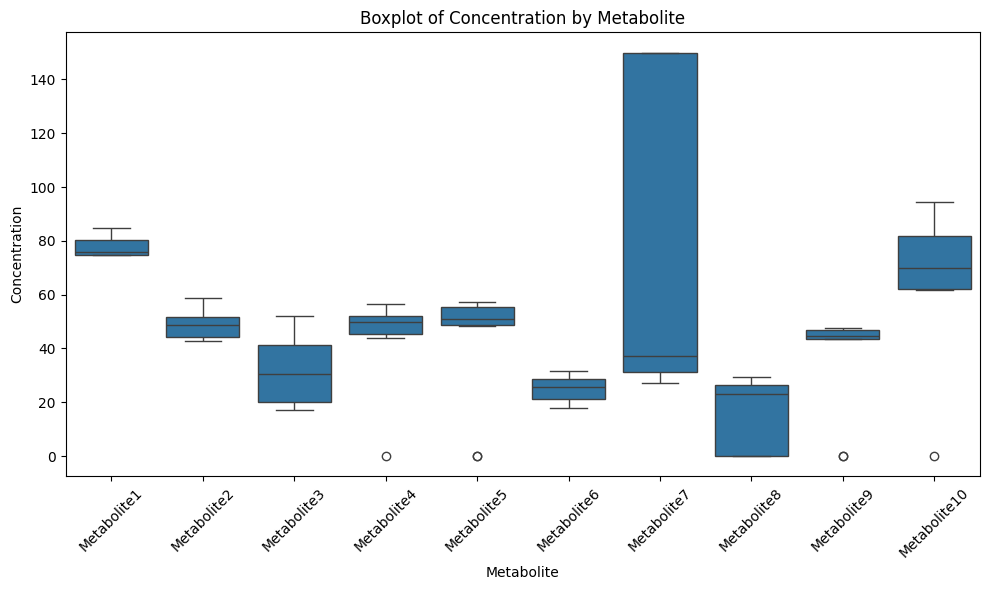

In [10]:
# Step 8: Visualizations

# Seaborn: Boxplot of Concentration distribution per Metabolite
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Metabolite', y='Concentration')
plt.title("Boxplot of Concentration by Metabolite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

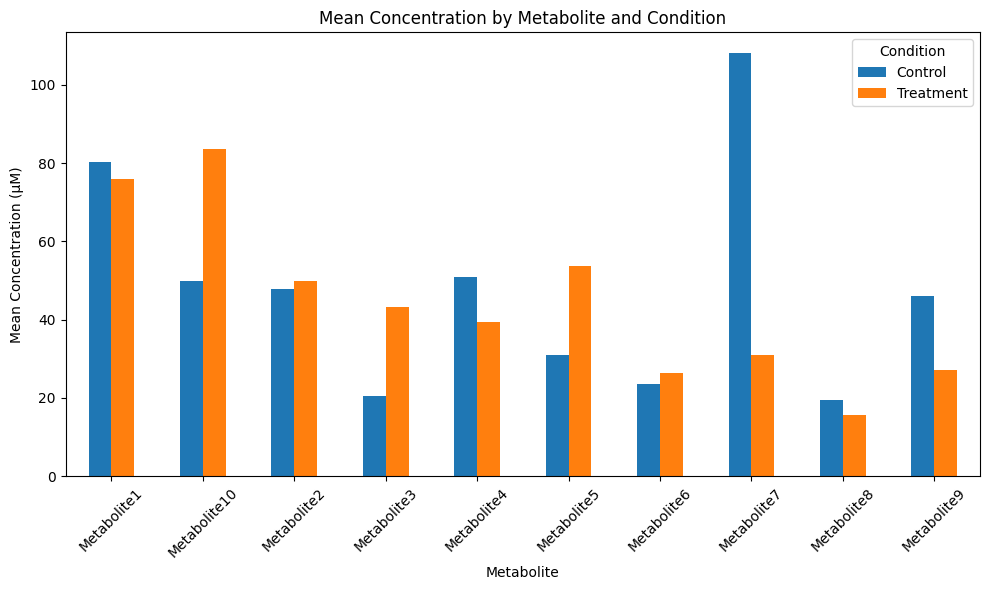

In [11]:
# Matplotlib: Bar plot of mean Concentration per Metabolite per Condition
pivot_data = mean_concentration.pivot(index='Metabolite', columns='Condition', values='Concentration')
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Mean Concentration (μM)")
plt.title("Mean Concentration by Metabolite and Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:

# Plotly: Interactive line plot for a specific Metabolite
selected_metabolite = df['Metabolite'].unique()[0]  # choose first one or change manually
filtered_df = df[df['Metabolite'] == selected_metabolite]

fig = px.line(filtered_df, x='Replicate', y='Concentration', color='Condition',
              title=f"Concentration Trends Across Replicates for {selected_metabolite}")
fig.show()

In [19]:


if __name__ == '__main__':
    filepath = 'metabolic_dataset.csv'  
    df = load_data(filepath)
    df = handle_missing_values(df)
    df = standardize_units(df)

First five rows of data:
    Metabolite Condition  Replicate  Concentration Units
0  Metabolite1   Control          1      80.281301    μM
1  Metabolite1   Control          2      84.658008    μM
2  Metabolite1   Control          3      75.872092    μM
3  Metabolite1   Control          4      75.872174    μM
4  Metabolite1   Control          5      84.938922    μM
